# r/CryptoCurrency Daily Thread Sentiment

## Introduction

The following project is meant to be an introduction into data gathering, cleaning, and modeling with a Keras neural network. In a nutshell, we scrape comments from the r/CryptoCurrency subreddit's daily thread, label this data with Bitcoin's future price action, and attempt to predict future price action based on comment sentiment. This is a learning project, and should not be used in deployement.

## Scraping Daily Thread Comments

Let's start by collecting the data: comments in the r/CryptoCurrency's daily thread. To gather this data, we will use Reddit's API (praw), along with PushShiftAPI (psaw) which enables requests for archived threads. Without psaw, we wouldn't be able to request threads as far back as 2017 (or further). The prerequisites are a Reddit account with an activated API key. 

### Loading Daily Thread Posts with Reddit API

In [1]:
import praw
import json

In [2]:
# This method uses the official Reddit API, but is limited to loading the 1000 most recent posts
# In otherwords, this alone won't work.

with open('secrets.json') as f: # Local secrets file
    secrets = json.load(f)
    
reddit = praw.Reddit( # Create reddit object
                        client_id = secrets['client_id'],
                        client_secret = secrets['client_secret'],
                        user_agent = secrets['user_agent'],
                        username = secrets['username'],
                        password = secrets['password'],
                        check_for_async=False
                    )

### Loading Daily Thread Posts with Pushshift API

In [3]:
import datetime as dt

from psaw import PushshiftAPI
from datetime import datetime, timezone, timedelta
from dateutil.relativedelta import relativedelta

In [4]:
subred = reddit.subreddit("cryptocurrency") # Creating subreddit object

api = PushshiftAPI(reddit)

In [6]:
startDate = int(datetime(2017, 5, 18).timestamp()) # May 18, 2017
endDate = int(datetime(2022, 5, 28).timestamp()) # May 28, 2022

subs = api.search_submissions(
    after= startDate,
    before= endDate,
    subreddit= subred,
    title="Daily Discussion - ",
    max_results_per_request=1000
)

### Get User Comments

This method iterates through each thread and collects user comments. It is slow, and has room for improvement: 
- Using asyncio to make asynchronous calls may speed up the process
- Collect data without conditionals, and clean it later using vectorization
- Use top comments only, rather than the first 100 comments

In [7]:
import numpy as np
import pandas as pd

In [8]:
index = []
data = []

for submission in subs:
    
    submissionTime = dt.datetime.fromtimestamp(submission.created_utc)
    title = submission.title
    
    if not title.startswith("Daily Discussion -"): # Removing incorrect search results
        print('Wrong submission, discarded.')
        continue
    
    if len(submission.comments) < 10: # Removing submissions with empty comment sections
        print('Empty comments, discarded.')
        continue
        
    index.append(submissionTime)
    
    commentTxt = []
    
    for comment in submission.comments[1:100]: # Collecting comments except the first (bot comment)
        try: 
            body = comment.body
            # print(body)
            if body == '[removed]' or body == '[deleted]' or not body:
                continue
            else:
                commentTxt.append(comment.body)
        except:
            continue
    
    data.append(commentTxt)
    
    print("Submission retrieved: " + str(submission))

df = pd.DataFrame(index=pd.DatetimeIndex(index), data=data)

C:\Users\AbEl-\anaconda3\envs\keras-gpu\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: uvnkf3
Submission retrieved: uuz7kw
Submission retrieved: uub4q5
Submission retrieved: utglme
Wrong submission, discarded.
Submission retrieved: usqdsb
Submission retrieved: urzycg
Submission retrieved: ur9n9b
Submission retrieved: uqixqt
Submission retrieved: uptmxj
Submission retrieved: up4vhy
Submission retrieved: uoibxt
Submission retrieved: unvnyw
Submission retrieved: unq9b1
Submission retrieved: umwhav
Submission retrieved: um52ai
Submission retrieved: ulekx1
Submission retrieved: ukpqpj
Submission retrieved: uk0tz8
Submission retrieved: ujdieh
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: uik8ib
Submission retrieved: uhtmwi
Submission retrieved: uh3b1k
Submission retrieved: ugcv0g
Submission retrieved: ufnevk
Submission retrieved: ueyz76
Submission retrieved: ue8usb
Submission ret

Submission retrieved: pwtxgp
Wrong submission, discarded.
Submission retrieved: pw5es7
Submission retrieved: pviiv6
Submission retrieved: puvi88
Submission retrieved: pu7yoc
Submission retrieved: ptj3kd
Submission retrieved: psvg0c
Wrong submission, discarded.
Submission retrieved: ps6zr9
Submission retrieved: prjhps
Wrong submission, discarded.
Submission retrieved: pqxe2x
Wrong submission, discarded.
Submission retrieved: pqbt3r
Submission retrieved: ppp57x
Submission retrieved: pp24i3
Submission retrieved: poermx
Submission retrieved: pnriu8
Submission retrieved: pn45df
Submission retrieved: pmi8kw
Submission retrieved: plwns3
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: pl9rr3
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: pkmc78
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: pjz7g6
Wrong submission, discarded.
Wrong submission, discarded.
Submission ret

Submission retrieved: m2cto9
Wrong submission, discarded.
Submission retrieved: m1k408
Submission retrieved: m0tt49
Submission retrieved: lxz2a0
Submission retrieved: lx7wg5
Wrong submission, discarded.
Submission retrieved: lwg65q
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: lu0lxv
Wrong submission, discarded.
Submission retrieved: ltbec5
Submission retrieved: lskp84
Submission retrieved: lrqz45
Empty comments, discarded.
Wrong submission, discarded.
Submission retrieved: lqxb15
Submission retrieved: lq3vqf
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: lpa5o5
Submission retrieved: lok7fs
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: lnu3n9
Submission retrieved: ln18h2
Submission retrieved: lm8ij1
Submission retrieved: lkqsuv
Submission retrieved: lk0sff
Wrong submission, discarded.
Wrong submission, discarded.
Submission retrieved: ljcnk1
Submission retri

Submission retrieved: gg4wtb
Submission retrieved: gfii5t
Submission retrieved: gevvf3
Submission retrieved: ge9euf
Submission retrieved: gdnbuf
Submission retrieved: gcgwch
Submission retrieved: gbts6y
Submission retrieved: gal21q
Submission retrieved: g8ptb7
Submission retrieved: g84dua
Submission retrieved: g7jr5k
Submission retrieved: g6y71h
Submission retrieved: g6ckxn
Submission retrieved: g5qwoj
Submission retrieved: g4ijik
Submission retrieved: g3y0hb
Wrong submission, discarded.
Submission retrieved: g3ds1b
Wrong submission, discarded.
Submission retrieved: g24448
Submission retrieved: g1h5ay
Submission retrieved: g0uwpe
Submission retrieved: fzm6qs
Wrong submission, discarded.
Submission retrieved: fyscy4
Submission retrieved: fy3v5d
Wrong submission, discarded.
Submission retrieved: fxi179
Wrong submission, discarded.
Submission retrieved: fwvwxs
Submission retrieved: fvoi04
Submission retrieved: fv4ach
Submission retrieved: fujnj5
Submission retrieved: ftbv5k
Submission ret

Submission retrieved: bljsb6
Submission retrieved: bl53du
Submission retrieved: bkrlmi
Submission retrieved: bkfdqy
Submission retrieved: bk25nb
Submission retrieved: bjohvq
Submission retrieved: bihzs7
Empty comments, discarded.
Empty comments, discarded.
Submission retrieved: bhtctz
Submission retrieved: bhfvtg
Empty comments, discarded.
Submission retrieved: bh1zya
Empty comments, discarded.
Submission retrieved: bgnri3
Empty comments, discarded.
Submission retrieved: bg9hgk
Empty comments, discarded.
Submission retrieved: bfvl3i
Empty comments, discarded.
Submission retrieved: bfixlh
Empty comments, discarded.
Submission retrieved: bf69cb
Submission retrieved: besskv
Empty comments, discarded.
Submission retrieved: be17f8
Empty comments, discarded.
Submission retrieved: bdngk6
Empty comments, discarded.
Submission retrieved: bcx3r4
Submission retrieved: bckr1g
Submission retrieved: bc75eu
Empty comments, discarded.
Submission retrieved: bbtgv1
Empty comments, discarded.
Submission 

Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submissi

Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submission, discarded.
Wrong submissi

In [10]:
from datetime import date

df.to_csv('CryptoCurrencyComments' + str(date.today()) + '.csv')

## Loading Comments from CSV

In [1]:
import praw
import json
import datetime as dt
import numpy as np
import pandas as pd

from psaw import PushshiftAPI
from datetime import datetime, timezone, timedelta, date
from dateutil.relativedelta import relativedelta

with open('secrets.json') as f: # Local secrets file
    secrets = json.load(f)
    
startDate = int(datetime(2017, 5, 18).timestamp()) # May 18, 2017
endDate = int(datetime(2022, 5, 28).timestamp()) # May 28, 2022

# df = pd.read_csv('CryptoCurrencyComments2022-05-27.csv', parse_dates=True, index_col=0)
df = pd.read_csv('CryptoCurrencyComments2022-05-29.csv', parse_dates=True, index_col=0)

In [2]:
print("Shape of DataFrame: " + str(np.shape(df)))

Shape of DataFrame: (993, 99)


## Labeling the Data with Bitcoin Price Action

### Logic Behind the Model

The theory is, Reddit sentiment may have an impact on the short term (1-3 days) price action of Bitcoin. We hope to see it here. In order to make the association with our data, we will label the comments with Bitcoin's future price action. First, we will take the price of Bitcoin at the day's close, then compare it with the close 1-3 days into the future. For example:
- If the change in price is positive, the day will be labled with a '1.0' 
- If the change in price is negative, the day will be labled with a '0.0'  

We will then train the model with these labels to try and pick out what sentiment might indicate in the Bitcoin market.

### Collecting Crypto Price Data

In [3]:
import requests

time_start = datetime.fromtimestamp(startDate).isoformat() # Converting Unix to ISO 8601 format
time_end = (datetime.fromtimestamp(endDate) + timedelta(days=1)).isoformat()

url = "https://rest.coinapi.io/v1/exchangerate/BTC/USD/history?period_id=1DAY&time_start=" + time_start + "&time_end=" + time_end + "&limit=100000"
headers = {"X-CoinAPI-Key" : secrets['coin_api2']}

try:
    response = requests.get(url, headers = headers)
    coin_data = json.loads(response.text)
    btc_data = pd.DataFrame(coin_data)
    
except (RuntimeError, TypeError, NameError) as err:
    print(err)
except ValueError:
    print(coin_data)

In [4]:
print(time_start)
print(time_end)

2017-05-18T00:00:00
2022-05-29T00:00:00


### Setting the Time Index

In [5]:
import dateutil.parser as dp

btc_data_close_indexed = btc_data.set_index(pd.DatetimeIndex(btc_data['time_close'])) # Set time as index

### Creating the Labels

The timestamps for our data and labels don't match up. It's important to note that we are taking the market close data at a time, as well as the time of the reddit post's creation (which is then followed by a full day of new comments). The time between the post's creation and the day's close could be several hours apart. In order to mitigate this issue, we ignore the hours, and zip data using only the date. Another important issue to note is how some days don't have new posts, in which case we can ignore that day's price action.

We can mitigate both of these issues by creating a label list that is filtered by the data index's datestamps using the 'date' method from 'datetime' as shown below.

In [6]:
btc_data_close_indexed.info()
# df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1838 entries, 2017-05-18 23:59:00+00:00 to 2022-05-29 00:00:00+00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time_period_start  1838 non-null   object 
 1   time_period_end    1838 non-null   object 
 2   time_open          1838 non-null   object 
 3   time_close         1838 non-null   object 
 4   rate_open          1838 non-null   float64
 5   rate_high          1838 non-null   float64
 6   rate_low           1838 non-null   float64
 7   rate_close         1838 non-null   float64
dtypes: float64(4), object(4)
memory usage: 129.2+ KB


In [7]:
labelIndex = df.index.tolist() # This is just a copy of the data's index (timestamps)
labelList = []

for d in labelIndex:
    btcClose = btc_data_close_indexed.loc[str(d.date()), 'rate_close'].to_numpy()[0] # This is how we sync the data with labels
    
    try:
        nextClose = btc_data_close_indexed.loc[str((d + dt.timedelta(days=1)).date()), 'rate_close'].to_numpy()[0]

        if (nextClose - btcClose) > 0:    # Bitcoin goes up, label is 1
            # print(1)
            labelList.append(1)
        else:                               # Otherwise, label is 0
            # print(0)
            labelList.append(0.0)
            
    except:
        print("Tomorrow hasn't happened yet.") # We can't request prices too far into the future
        continue 
    
    print(str(d.date()) + " recorded.")

if len(labelIndex) > len(labelList): # Just in case the data exists, but the label doesn't
    m = len(labelIndex) - len(labelList)
else:
    m = 0
print("m = " + str(m))

labeledDf = pd.DataFrame(index=pd.DatetimeIndex(labelIndex[m:]), data=labelList) # index all except the first m entries

print(labeledDf.info())

2022-05-22 recorded.
2022-05-21 recorded.
2022-05-20 recorded.
2022-05-19 recorded.
2022-05-18 recorded.
2022-05-17 recorded.
2022-05-16 recorded.
2022-05-15 recorded.
2022-05-14 recorded.
2022-05-13 recorded.
2022-05-12 recorded.
2022-05-12 recorded.
2022-05-11 recorded.
2022-05-10 recorded.
2022-05-09 recorded.
2022-05-08 recorded.
2022-05-07 recorded.
2022-05-06 recorded.
2022-05-05 recorded.
2022-05-04 recorded.
2022-05-03 recorded.
2022-05-02 recorded.
2022-05-01 recorded.
2022-04-30 recorded.
2022-04-29 recorded.
2022-04-28 recorded.
2022-04-27 recorded.
2022-04-26 recorded.
2022-04-25 recorded.
2022-04-24 recorded.
2022-04-23 recorded.
2022-04-22 recorded.
2022-04-21 recorded.
2022-04-20 recorded.
2022-04-19 recorded.
2022-04-18 recorded.
2022-04-17 recorded.
2022-04-16 recorded.
2022-04-15 recorded.
2022-04-14 recorded.
2022-04-13 recorded.
2022-04-12 recorded.
2022-04-11 recorded.
2022-04-10 recorded.
2022-04-09 recorded.
2022-04-08 recorded.
2022-04-07 recorded.
2022-04-06 re

2021-04-16 recorded.
2021-04-15 recorded.
2021-04-14 recorded.
2021-04-08 recorded.
2021-04-07 recorded.
2021-04-06 recorded.
2021-04-05 recorded.
2021-04-04 recorded.
2021-04-03 recorded.
2021-04-02 recorded.
2021-04-01 recorded.
2021-03-31 recorded.
2021-03-30 recorded.
2021-03-29 recorded.
2021-03-28 recorded.
2021-03-27 recorded.
2021-03-16 recorded.
2021-03-15 recorded.
2021-03-14 recorded.
2021-03-13 recorded.
2021-03-12 recorded.
2021-03-11 recorded.
2021-03-10 recorded.
2021-03-09 recorded.
2021-03-08 recorded.
2021-03-04 recorded.
2021-03-03 recorded.
2021-03-02 recorded.
2021-02-27 recorded.
2021-02-26 recorded.
2021-02-25 recorded.
2021-02-24 recorded.
2021-02-23 recorded.
2021-02-22 recorded.
2021-02-21 recorded.
2021-02-20 recorded.
2021-02-19 recorded.
2021-02-18 recorded.
2021-02-17 recorded.
2021-02-15 recorded.
2021-02-14 recorded.
2021-02-13 recorded.
2021-02-12 recorded.
2021-02-11 recorded.
2021-02-10 recorded.
2021-02-08 recorded.
2021-02-07 recorded.
2021-02-03 re

2019-11-01 recorded.
2019-10-31 recorded.
2019-10-30 recorded.
2019-10-29 recorded.
2019-10-26 recorded.
2019-10-25 recorded.
2019-10-24 recorded.
2019-10-23 recorded.
2019-10-21 recorded.
2019-10-20 recorded.
2019-10-19 recorded.
2019-10-18 recorded.
2019-10-17 recorded.
2019-10-16 recorded.
2019-10-15 recorded.
2019-10-14 recorded.
2019-10-12 recorded.
2019-10-09 recorded.
2019-10-08 recorded.
2019-10-06 recorded.
2019-10-03 recorded.
2019-10-02 recorded.
2019-10-01 recorded.
2019-09-30 recorded.
2019-09-29 recorded.
2019-09-28 recorded.
2019-09-27 recorded.
2019-09-26 recorded.
2019-09-25 recorded.
2019-09-24 recorded.
2019-09-23 recorded.
2019-09-22 recorded.
2019-09-21 recorded.
2019-09-20 recorded.
2019-09-19 recorded.
2019-09-18 recorded.
2019-09-17 recorded.
2019-09-16 recorded.
2019-09-15 recorded.
2019-09-14 recorded.
2019-09-13 recorded.
2019-09-12 recorded.
2019-09-10 recorded.
2019-09-05 recorded.
2019-09-04 recorded.
2019-09-02 recorded.
2019-09-01 recorded.
2019-08-30 re

## Setting up for the Model

### Collapsing the Data Columns

At this point, we have a time indexed dataframe with one column representing the labels (labeledDf), and a second time indexed dataframe with many columns where each column is a comment for a given date (df). In other words, we need to zip two dataframes where one has the shape (993, 1) and the other might have a shape of (993, 100). Since we created both dataframes with the same time index, merging them should be easy. Before we do that, we need to deal with the different shapes.
- dataframe: We can collapse all the comments into one long list of strings (100 columns to 1 column) 
- dataframe_Single: We can unstack the columns (100 columns to 100 rows)
- dataframe_Stacked: We can leave the dataframe as is, and pass in all the daily comments as seperate variables (best option)

We also need to create a dictionary and encode our data to prepare it for Keras.

In [8]:
# We need to match a dataframe (df) with number of columns for comments per day, to the specific day's label of 1, or 0.
# Some of the columns are null, and we need to ignore them.

data_text = []

keys = map(str, list(range(0,df.shape[1] - 1))) # Getting column keys for df

dataframe = df[keys].fillna('').agg(' '.join, axis=1).str.split().to_frame() # aggregate all columns into a single column for any index

print(dataframe.iloc[0])



# Alternatively, we can keep the columns and unstack later

dataframe_single = df.fillna('').applymap(lambda s: s.split())

print(dataframe_single.iloc[0])
    

0    [Brace, yourselves,, the, LRC, daily, is, comi...
Name: 2022-05-22 17:00:10, dtype: object
0     [Brace, yourselves,, the, LRC, daily, is, comi...
1     [Now, if, LRC, could, just, continue, to, pump...
2     [I'm, not, broke,, I'm, just, a, long, term, i...
3     [we, have, done, it., 8, weeks, of, red!, cong...
4     [FUCK, YEAH, we're, no, longer, correlated, wi...
                            ...                        
94    [Those, that, are, hoping, for, pumps,, do, yo...
95    [Drink, water, and, stake, crypto, is, the, mo...
96     [I'm, afraid, we, go, up, and, then, down, down]
97    [Depending, on, the, outcome, of, the, ALGO, g...
98                                                   []
Name: 2022-05-22 17:00:10, Length: 99, dtype: object


### Creating our Dictionary

Now we can clean our data, and create a dictionary.

In [9]:
# Removing punctuations and lowercasing our data

punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~’“”\+|'''
 
    
# Removing punctuations and capitalization in a string

def cleanWord(b):
    clean = ''
    for ele in b:
        if not ele in punc:
            clean += ele
    return clean.lower()

def cleanList(a):
    cleanedList = []
    for word in a:
        cleanedList.append(cleanWord(word))
    return cleanedList

In [10]:
# Cleaning our dataframes with vectorization

dataframe = dataframe.applymap(lambda s: cleanList(s))

dataframe_single = dataframe_single.applymap(lambda s: cleanList(s))

In [11]:
print(dataframe.iloc[0])
print(dataframe_single.iloc[0])

0    [brace, yourselves, the, lrc, daily, is, comin...
Name: 2022-05-22 17:00:10, dtype: object
0     [brace, yourselves, the, lrc, daily, is, comin...
1     [now, if, lrc, could, just, continue, to, pump...
2     [im, not, broke, im, just, a, long, term, inve...
3     [we, have, done, it, 8, weeks, of, red, congrats]
4     [fuck, yeah, were, no, longer, correlated, wit...
                            ...                        
94    [those, that, are, hoping, for, pumps, do, you...
95    [drink, water, and, stake, crypto, is, the, mo...
96      [im, afraid, we, go, up, and, then, down, down]
97    [depending, on, the, outcome, of, the, algo, g...
98                                                   []
Name: 2022-05-22 17:00:10, Length: 99, dtype: object


In [12]:
import random

flatData = [c for sublist in dataframe[0].tolist() for c in sublist] # Flatten data for dictionary creation

print("Data Shape : " + str(np.asarray(dataframe[0].tolist(), dtype=object).shape))
print("FlatData Shape : " + str(np.asarray(flatData).shape))

random.shuffle(flatData) # Shuffling words, and in return shuffling their dictionary values

dictionary = { i : flatData[i] for i in range (0, len(flatData)) } # Create word dictionary

print("Dictionary length: " + str(len(dictionary)))
print("Dictionary item 15: " + dictionary[15])

Data Shape : (993,)
FlatData Shape : (1886634,)
Dictionary length: 1886634
Dictionary item 15: have


In [13]:
# Remove duplicate entries
reverseDictionary = dict([(value, key) for (key, value) in dictionary.items()])

# Squishing the index values
reverseDictionary = {i: v for i, v in enumerate(reverseDictionary.keys())}

# Reversing key and value pairs again, leaving the 0 key open
reverseDictionary = dict([(value, key + 1) for (key, value) in reverseDictionary.items()])

print("Words in dictionary: " + str(len(reverseDictionary)))

dictionary = dict([(value, key) for (key, value) in reverseDictionary.items()]) # Syncing dictionary keys

dictionary[0] = "<PAD>" # Reserving the 0 key for padding

print(dictionary.get(0))
print(dictionary.get(1))

Words in dictionary: 55070
<PAD>
coupon


### Mapping our Data with Dictionary Values

In [112]:
# Possible further data cleaning:
# trimList = ["crypto", "eth", "bitcoin", "btc", "day", "time", "now", "im", "ive", "want", 
#             "will", "going", "thing", "cant", "got", "ill", "way", "seem", "u"]
# keepList = "bullish bearish bull bear buy sell dip dca hodl hold over red green".split()

count = 0

def fillZero(a):
    a.append(0)
    if len(a) < 100:
        fillZero(a)
    return a

def dicWord(a):
    word = a.lower()
    if word in reverseDictionary:
        return reverseDictionary.get(word)
    else:
        return 0

def dicList(a):
    newList = []
    
    for w in a:
        newList.append(dicWord(w))
    length = len(newList)
    
    if length == 100:
        return np.asarray(newList)
    elif length > 100:
        return np.asarray(newList[:100])
    elif length > 0:
        return np.asarray(fillZero(newList))
    else:
        global count
        count += 1
        return np.zeros(100, dtype=int)
    
def dicS(a):
    if isinstance(a, list):
        return dicList(a)
    elif isinstance(a, pd.Series):
        return a.apply(dicList)
    else:
        print("Error.")

dataframe_data = dataframe.apply(dicS)
dataframe_single_data = dataframe_single.apply(dicS)
    
print("Nan count: "+ str(count))

Nan count: 15910


In [113]:
print(dataframe_data.iloc[0])
print(dataframe_single_data.iloc[13])

0    [2187, 7085, 9, 277, 1026, 81, 169, 7283, 121,...
Name: 2022-05-22 17:00:10, dtype: object
0     [401, 20605, 284, 669, 893, 2281, 25107, 300, ...
1     [4182, 177, 11, 3345, 89, 485, 1122, 23, 2143,...
2     [9, 19276, 490, 81, 575, 2668, 348, 121, 238, ...
3     [3535, 20, 57, 10592, 21, 137, 929, 1292, 1461...
4     [2034, 1933, 929, 229, 21, 289, 507, 1371, 781...
                            ...                        
94    [575, 148, 1431, 10, 152, 158, 176, 121, 6745,...
95    [22, 58, 77, 3002, 9, 127, 758, 2, 3641, 5521,...
96    [1368, 300, 896, 49, 81, 1763, 456, 573, 348, ...
97    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
98    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: 2022-05-10 17:00:09, Length: 99, dtype: object


In [114]:
# Decode the data
def decode_data(text):
    return " ".join([dictionary.get(i, "?") for i in text])

print(decode_data(dataframe_single_data.iloc[0,2]))

im not broke im just a long term investor <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### Word Cloud of our Data

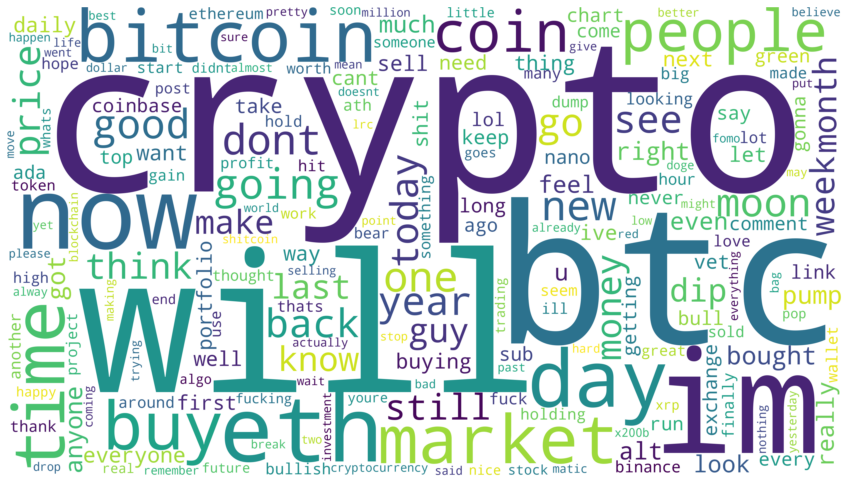

In [24]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in flatData)
stopwords = list(STOPWORDS)
# stopwords = stopwords + ["crypto", "eth", "bitcoin", "btc", "day", "time", "now", "im", "ive", "want", "will", "going", "thing", "cant", "got", "ill", "way", "seem", "u"]
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=3840, height=2160).generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('WordCloud.png')
plt.show()

### Further Cleaning of Our Data

It's easy to see that many of the common words in our data could have little to no indication of sentiment. For example, we might consider the words "bullish" as positive and "bear" as negative, but words like "I've" or "wallet" may have no correlation with sentiment. It may be helpful to create a list of words that we associate with positive, negative, or neutral sentiment for better filtering of our data. However, for the purposes of this project, we will move on to the next step.

### Combining the Data with the Labels

In [170]:
labeledDf.columns = ['Label']

# Labeling dataframe

dff = pd.concat([dataframe_data, labeledDf], axis=1).dropna() # Takes advantage of concat's index matching
numpyarray = dff.to_numpy() # Converting to numpy arrays for keras

# Labeling dataframe_Stacked

dfg = dataframe_single_data.to_numpy(na_value=0)
dfgStacked = []
for i, element in enumerate(dfg):
    dfgStacked.append(np.stack(element)) # Stacking to get rid of array(array()) problem
dfgLabels = labeledDf.to_numpy()

# Labeling dataframe_single

dfs = pd.concat([dataframe_single_data, labeledDf], axis=1).set_index('Label')
dfs = dfs.unstack().reset_index(level=[1]).dropna() # Unstacking to create 100 seperate data entries for each day
numpyarray_single = np.flip(dfs.to_numpy(), axis=1)

In [172]:
print(type(numpyarray))
print(np.shape(numpyarray))
print("Label: " + str(numpyarray[0,1]))
print("Data: " + str(numpyarray[0,0]))

<class 'numpy.ndarray'>
(993, 2)
Label: 0.0
Data: [ 2187  7085     9   277  1026    81   169  7283   121   290   277   417
   189  1066     2    26  1054  1178   575    77    68  1257   181  8782
    20   137    66    20   189    57   834   507  4370    83    14  1689
    79  2459   746    10   173  1691   292  2359   309   218  1009 11205
   128  2576  2594     5  1110   167 40034 26503    81  2399  1146   418
   233   158    52    81   204   442    49  7407   176  2559 37492  3498
   253   599   437   372    11  1669   169    28   128     9  2038   214
   209  2749  1632    77   206    14  2369   130   235   290    77   391
   242    49    50   191]


In [173]:
print(type(numpyarray_single))
print(np.shape(numpyarray_single))
print("Label: " + str(numpyarray_single[0,1]))
print("Data: " + str(numpyarray_single[0,0]))

<class 'numpy.ndarray'>
(98307, 2)
Label: 0.0
Data: [2187 7085    9  277 1026   81  169 7283    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [175]:
print(np.shape(dfgStacked))
print(np.shape(dfgLabels))
print("Label: " + str(dfgLabels[0]))
print("Data: " + str(dfgStacked[0]))

(993, 99, 100)
(993, 1)
Label: [0.]
Data: [[2187 7085    9 ...    0    0    0]
 [ 121  290  277 ...    0    0    0]
 [  20  137   66 ...    0    0    0]
 ...
 [  20 7581   83 ...    0    0    0]
 [ 444   39    9 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]


### The Data We Chose

Using the stacked dataset opens up the door for convolution layers, which will greatly improve our performance. For that reason, we will drop the other datasets here, and continue on without them.

In [301]:
# np.save('numpydata.npy', numpyarray)
# np.save('numpydata_single.npy', numpyarray_single)

np.save('numpydata_dfgStacked.npy', dfgStacked)
np.save('numpydata_dfgLabels.npy', dfgLabels)

np.save('dictionary.npy', dictionary) 

## Modeling the Data with Keras

### Loading the Data

In [1]:
import numpy as np

# numpyarray = np.load('numpydata.npy', allow_pickle=True)
# numpyarray_single = np.load('numpydata_single.npy', allow_pickle=True)

numpydata_dfgStacked = np.load('numpydata_dfgStacked.npy', allow_pickle=True)
numpydata_dfgLabels = np.load('numpydata_dfgLabels.npy', allow_pickle=True)

dictionary = np.load('dictionary.npy', allow_pickle=True).item()

# print(np.shape(numpyarray))
# print(np.shape(numpyarray_single))

### Processing the Data

Here is the final preperation for keras. We split the dataset into training and testing data. We also added a padding sequence, although it is not necessary as we created the dataset with padding in mind.

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# x = np.asarray(numpyarray[:,0])
# y = np.asarray(numpyarray[:,1]).astype('int')

# x = np.asarray(numpyarray_single[:,0])
# y = np.asarray(numpyarray_single[:,1]).astype('int')

x = np.asarray(numpydata_dfgStacked)
y = np.asarray(numpydata_dfgLabels).astype('int')

train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.1)

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding="post", maxlen=100, dtype='int')
test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding="post", maxlen=100, dtype='int')

print(train_data[0])
print(train_labels[0])

[[41095  5660   711 ...     0     0     0]
 [  184   435   109 ...     0     0     0]
 [43390   261     2 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]
[1]


### Is Our Data Balanced?

Well, sort of. Here we have a histogram showing the number of 1s versus the number of 0s in our dataset. There is a bit more 1s than we would like, but that's okay for now.

(893, 100, 100)
(893, 1)
0.5274356103023516
400.4074874580067
(array([422., 471.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)
(893, 100, 100)


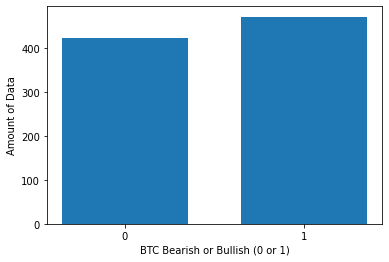

In [3]:
import matplotlib.pyplot as plt

print(np.shape(train_data))
print(np.shape(train_labels))
print(np.mean(train_labels))
print(np.mean(train_data))

print(plt.hist(train_labels, 
               bins=2, 
               rwidth=0.7
              ))

plt.xlabel('BTC Bearish or Bullish (0 or 1)')
plt.xticks([0.25, 0.75], ['0', '1'])

plt.ylabel('Amount of Data')

print(np.shape(train_data))

In [4]:
# Decode the data
def decode_data(text):
    return " ".join([dictionary.get(i, "?") for i in text])

print(decode_data(train_data[0,5]))

time for all that chinese new year money to spark a bull run s <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


### The Model

This is it. Let's summarize what we have so far. Our dataset consists of a two dimensional matrix of words, where each line represents a comment. We can use the Conv2D layer to filter important features of our data, but we must be careful. Unlike a 2D image, we don't want our kernel size to span across multiple comments (that wouldn't make sense). Instead, we can set our kernel size to filter 1 dimension at a time. 

In [5]:
print(np.shape(train_data))
print(len(train_data[0]))
print(len(train_data))
print(len(train_labels))

(893, 100, 100)
100
893
893


In [6]:
opt = tf.keras.optimizers.SGD(learning_rate=0.00002)
model = tf.keras.Sequential()

# Input shape when using Conv2D requires an input for "depth"
model.add(tf.keras.layers.Input(shape=(100, 100, 1)))

# Dropout to Prevent overfitting
model.add(tf.keras.layers.Dropout(0.6)) 

# Horizontal Filtering (across each comment)
model.add(tf.keras.layers.Conv2D(32, (11, 1), activation="relu"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 1)))
model.add(tf.keras.layers.Conv2D(64, (6, 1), activation="relu"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 1)))
model.add(tf.keras.layers.Conv2D(128, (2, 1), activation="relu"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 1)))

# Vertical Filtering (filtering the 100 daily comments)
model.add(tf.keras.layers.Conv2D(128, (1, 11), activation="relu"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(1, 2)))
model.add(tf.keras.layers.Conv2D(64, (1, 6), activation="relu"))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(1, 2)))
model.add(tf.keras.layers.Conv2D(32, (1, 2), activation="relu"))

# Flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


model.summary()

model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

fitModel = model.fit( train_data
                    , train_labels
                    , epochs=1000
                    , batch_size=10000
                    , validation_split=0.2
                    , verbose=1 
                    )

results = model.evaluate(test_data, test_labels)

print(results)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 100, 32)       384       
_________________________________________________________________
average_pooling2d (AveragePo (None, 45, 100, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 100, 64)       12352     
_________________________________________________________________
average_pooling2d_1 (Average (None, 20, 100, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 100, 128)      16512     
_________________________________________________________________
average_pooling2d_2 (Average (None, 9, 100, 128)       0

Epoch 43/1000
1/1 [==============================] - 0s 344ms/step - loss: 7.2511 - accuracy: 0.5042 - val_loss: 4.4250 - val_accuracy: 0.5140
Epoch 44/1000
1/1 [==============================] - 0s 333ms/step - loss: 6.8536 - accuracy: 0.5280 - val_loss: 4.1282 - val_accuracy: 0.5084
Epoch 45/1000
1/1 [==============================] - 0s 324ms/step - loss: 8.0993 - accuracy: 0.5070 - val_loss: 4.2759 - val_accuracy: 0.5251
Epoch 46/1000
1/1 [==============================] - 0s 326ms/step - loss: 8.0869 - accuracy: 0.4860 - val_loss: 4.1141 - val_accuracy: 0.5084
Epoch 47/1000
1/1 [==============================] - 0s 336ms/step - loss: 7.1526 - accuracy: 0.5182 - val_loss: 4.2983 - val_accuracy: 0.5140
Epoch 48/1000
1/1 [==============================] - 0s 325ms/step - loss: 7.4267 - accuracy: 0.4692 - val_loss: 4.0221 - val_accuracy: 0.5084
Epoch 49/1000
1/1 [==============================] - 0s 355ms/step - loss: 7.2063 - accuracy: 0.5126 - val_loss: 4.1029 - val_accuracy: 0.5084

1/1 [==============================] - 0s 319ms/step - loss: 5.5283 - accuracy: 0.4958 - val_loss: 3.3713 - val_accuracy: 0.5084
Epoch 101/1000
1/1 [==============================] - 0s 330ms/step - loss: 5.3890 - accuracy: 0.5154 - val_loss: 3.4057 - val_accuracy: 0.5251
Epoch 102/1000
1/1 [==============================] - 0s 344ms/step - loss: 5.4323 - accuracy: 0.5350 - val_loss: 3.3603 - val_accuracy: 0.5084
Epoch 103/1000
1/1 [==============================] - 0s 321ms/step - loss: 5.4455 - accuracy: 0.5154 - val_loss: 3.3772 - val_accuracy: 0.5251
Epoch 104/1000
1/1 [==============================] - 0s 316ms/step - loss: 5.6432 - accuracy: 0.5014 - val_loss: 3.3614 - val_accuracy: 0.5251
Epoch 105/1000
1/1 [==============================] - 0s 329ms/step - loss: 4.6251 - accuracy: 0.5616 - val_loss: 3.2769 - val_accuracy: 0.5196
Epoch 106/1000
1/1 [==============================] - 0s 347ms/step - loss: 4.4655 - accuracy: 0.5322 - val_loss: 3.5115 - val_accuracy: 0.5140
Epoch 1

Epoch 157/1000
1/1 [==============================] - 0s 396ms/step - loss: 4.4308 - accuracy: 0.5266 - val_loss: 2.8366 - val_accuracy: 0.5084
Epoch 158/1000
1/1 [==============================] - 0s 324ms/step - loss: 3.9822 - accuracy: 0.5742 - val_loss: 2.9790 - val_accuracy: 0.5028
Epoch 159/1000
1/1 [==============================] - 0s 327ms/step - loss: 3.9335 - accuracy: 0.5630 - val_loss: 2.9838 - val_accuracy: 0.4972
Epoch 160/1000
1/1 [==============================] - 0s 356ms/step - loss: 4.1627 - accuracy: 0.5574 - val_loss: 3.2566 - val_accuracy: 0.5084
Epoch 161/1000
1/1 [==============================] - 0s 331ms/step - loss: 4.4276 - accuracy: 0.5294 - val_loss: 2.8748 - val_accuracy: 0.5028
Epoch 162/1000
1/1 [==============================] - 0s 336ms/step - loss: 4.4107 - accuracy: 0.5266 - val_loss: 3.2403 - val_accuracy: 0.5084
Epoch 163/1000
1/1 [==============================] - 0s 345ms/step - loss: 4.2690 - accuracy: 0.5336 - val_loss: 2.9440 - val_accuracy:

Epoch 214/1000
1/1 [==============================] - 0s 381ms/step - loss: 3.8376 - accuracy: 0.5420 - val_loss: 2.7977 - val_accuracy: 0.4916
Epoch 215/1000
1/1 [==============================] - 0s 369ms/step - loss: 3.5571 - accuracy: 0.5756 - val_loss: 2.7855 - val_accuracy: 0.4916
Epoch 216/1000
1/1 [==============================] - 0s 360ms/step - loss: 3.7053 - accuracy: 0.5448 - val_loss: 2.5910 - val_accuracy: 0.4916
Epoch 217/1000
1/1 [==============================] - 0s 333ms/step - loss: 3.8562 - accuracy: 0.5392 - val_loss: 2.6168 - val_accuracy: 0.4860
Epoch 218/1000
1/1 [==============================] - 0s 332ms/step - loss: 3.7165 - accuracy: 0.5420 - val_loss: 2.6122 - val_accuracy: 0.4972
Epoch 219/1000
1/1 [==============================] - 0s 343ms/step - loss: 3.7502 - accuracy: 0.5378 - val_loss: 2.6736 - val_accuracy: 0.4860
Epoch 220/1000
1/1 [==============================] - 0s 347ms/step - loss: 3.6253 - accuracy: 0.5420 - val_loss: 2.7896 - val_accuracy:

Epoch 271/1000
1/1 [==============================] - 0s 349ms/step - loss: 3.3493 - accuracy: 0.5574 - val_loss: 2.4273 - val_accuracy: 0.4860
Epoch 272/1000
1/1 [==============================] - 0s 348ms/step - loss: 3.1385 - accuracy: 0.5532 - val_loss: 2.6012 - val_accuracy: 0.4525
Epoch 273/1000
1/1 [==============================] - 0s 342ms/step - loss: 3.1553 - accuracy: 0.5518 - val_loss: 2.4219 - val_accuracy: 0.4860
Epoch 274/1000
1/1 [==============================] - 0s 341ms/step - loss: 3.2799 - accuracy: 0.5560 - val_loss: 2.5175 - val_accuracy: 0.4637
Epoch 275/1000
1/1 [==============================] - 0s 354ms/step - loss: 2.9852 - accuracy: 0.5742 - val_loss: 2.5063 - val_accuracy: 0.4637
Epoch 276/1000
1/1 [==============================] - 0s 351ms/step - loss: 3.1681 - accuracy: 0.5616 - val_loss: 2.3257 - val_accuracy: 0.4860
Epoch 277/1000
1/1 [==============================] - 0s 350ms/step - loss: 3.6954 - accuracy: 0.5070 - val_loss: 2.4700 - val_accuracy:

Epoch 328/1000
1/1 [==============================] - 0s 384ms/step - loss: 2.9059 - accuracy: 0.5728 - val_loss: 2.1577 - val_accuracy: 0.4693
Epoch 329/1000
1/1 [==============================] - 0s 379ms/step - loss: 3.0867 - accuracy: 0.5462 - val_loss: 2.1324 - val_accuracy: 0.4749
Epoch 330/1000
1/1 [==============================] - 0s 461ms/step - loss: 2.9958 - accuracy: 0.5490 - val_loss: 2.3396 - val_accuracy: 0.4581
Epoch 331/1000
1/1 [==============================] - 0s 397ms/step - loss: 2.6125 - accuracy: 0.5756 - val_loss: 2.2315 - val_accuracy: 0.4581
Epoch 332/1000
1/1 [==============================] - 0s 405ms/step - loss: 2.7355 - accuracy: 0.5770 - val_loss: 2.1885 - val_accuracy: 0.4637
Epoch 333/1000
1/1 [==============================] - 0s 451ms/step - loss: 2.9310 - accuracy: 0.5854 - val_loss: 2.2940 - val_accuracy: 0.4581
Epoch 334/1000
1/1 [==============================] - 0s 437ms/step - loss: 2.8093 - accuracy: 0.5840 - val_loss: 2.2375 - val_accuracy:

Epoch 385/1000
1/1 [==============================] - 0s 400ms/step - loss: 2.7174 - accuracy: 0.5742 - val_loss: 2.0179 - val_accuracy: 0.4581
Epoch 386/1000
1/1 [==============================] - 0s 404ms/step - loss: 2.5982 - accuracy: 0.5728 - val_loss: 2.1053 - val_accuracy: 0.4860
Epoch 387/1000
1/1 [==============================] - 0s 399ms/step - loss: 2.7676 - accuracy: 0.5588 - val_loss: 2.0653 - val_accuracy: 0.4693
Epoch 388/1000
1/1 [==============================] - 0s 440ms/step - loss: 2.5212 - accuracy: 0.5812 - val_loss: 2.1573 - val_accuracy: 0.4860
Epoch 389/1000
1/1 [==============================] - 0s 482ms/step - loss: 2.4633 - accuracy: 0.5770 - val_loss: 2.0735 - val_accuracy: 0.4804
Epoch 390/1000
1/1 [==============================] - 0s 472ms/step - loss: 2.5764 - accuracy: 0.5770 - val_loss: 2.0286 - val_accuracy: 0.4581
Epoch 391/1000
1/1 [==============================] - 1s 506ms/step - loss: 2.6865 - accuracy: 0.5518 - val_loss: 2.0716 - val_accuracy:

Epoch 442/1000
1/1 [==============================] - 0s 438ms/step - loss: 2.4333 - accuracy: 0.5770 - val_loss: 1.9763 - val_accuracy: 0.4749
Epoch 443/1000
1/1 [==============================] - 0s 392ms/step - loss: 2.6140 - accuracy: 0.5532 - val_loss: 1.9401 - val_accuracy: 0.4693
Epoch 444/1000
1/1 [==============================] - 0s 391ms/step - loss: 2.5224 - accuracy: 0.5742 - val_loss: 1.9746 - val_accuracy: 0.4804
Epoch 445/1000
1/1 [==============================] - 0s 392ms/step - loss: 2.4786 - accuracy: 0.5630 - val_loss: 1.9872 - val_accuracy: 0.4804
Epoch 446/1000
1/1 [==============================] - 0s 430ms/step - loss: 2.3925 - accuracy: 0.5770 - val_loss: 1.9718 - val_accuracy: 0.4749
Epoch 447/1000
1/1 [==============================] - 0s 386ms/step - loss: 2.2722 - accuracy: 0.5910 - val_loss: 1.9428 - val_accuracy: 0.4749
Epoch 448/1000
1/1 [==============================] - 0s 397ms/step - loss: 2.4074 - accuracy: 0.5630 - val_loss: 1.9798 - val_accuracy:

Epoch 499/1000
1/1 [==============================] - 0s 448ms/step - loss: 2.3645 - accuracy: 0.5686 - val_loss: 1.8355 - val_accuracy: 0.4860
Epoch 500/1000
1/1 [==============================] - 0s 448ms/step - loss: 2.2026 - accuracy: 0.6036 - val_loss: 1.8550 - val_accuracy: 0.4860
Epoch 501/1000
1/1 [==============================] - 0s 447ms/step - loss: 2.2540 - accuracy: 0.5938 - val_loss: 1.8802 - val_accuracy: 0.4916
Epoch 502/1000
1/1 [==============================] - 0s 436ms/step - loss: 2.2406 - accuracy: 0.5742 - val_loss: 1.9044 - val_accuracy: 0.4916
Epoch 503/1000
1/1 [==============================] - 0s 445ms/step - loss: 2.1907 - accuracy: 0.5924 - val_loss: 1.8195 - val_accuracy: 0.4804
Epoch 504/1000
1/1 [==============================] - 0s 447ms/step - loss: 2.2353 - accuracy: 0.5798 - val_loss: 1.8473 - val_accuracy: 0.4916
Epoch 505/1000
1/1 [==============================] - 0s 437ms/step - loss: 2.2907 - accuracy: 0.5924 - val_loss: 1.9009 - val_accuracy:

Epoch 556/1000
1/1 [==============================] - 0s 354ms/step - loss: 2.2812 - accuracy: 0.5574 - val_loss: 1.7590 - val_accuracy: 0.4916
Epoch 557/1000
1/1 [==============================] - 0s 348ms/step - loss: 2.2535 - accuracy: 0.5434 - val_loss: 1.7482 - val_accuracy: 0.4916
Epoch 558/1000
1/1 [==============================] - 0s 409ms/step - loss: 2.1217 - accuracy: 0.5826 - val_loss: 1.7249 - val_accuracy: 0.4916
Epoch 559/1000
1/1 [==============================] - 0s 433ms/step - loss: 2.1965 - accuracy: 0.5686 - val_loss: 1.7302 - val_accuracy: 0.4916
Epoch 560/1000
1/1 [==============================] - 0s 465ms/step - loss: 1.8301 - accuracy: 0.6022 - val_loss: 1.8158 - val_accuracy: 0.4749
Epoch 561/1000
1/1 [==============================] - 0s 463ms/step - loss: 2.0025 - accuracy: 0.5826 - val_loss: 1.8501 - val_accuracy: 0.4804
Epoch 562/1000
1/1 [==============================] - 0s 445ms/step - loss: 2.1279 - accuracy: 0.6078 - val_loss: 1.7639 - val_accuracy:

Epoch 613/1000
1/1 [==============================] - 0s 347ms/step - loss: 2.0232 - accuracy: 0.5868 - val_loss: 1.7707 - val_accuracy: 0.4693
Epoch 614/1000
1/1 [==============================] - 0s 391ms/step - loss: 1.9468 - accuracy: 0.5910 - val_loss: 1.6504 - val_accuracy: 0.4916
Epoch 615/1000
1/1 [==============================] - 0s 408ms/step - loss: 2.1194 - accuracy: 0.5910 - val_loss: 1.6935 - val_accuracy: 0.4860
Epoch 616/1000
1/1 [==============================] - 0s 366ms/step - loss: 2.0496 - accuracy: 0.5896 - val_loss: 1.7337 - val_accuracy: 0.4860
Epoch 617/1000
1/1 [==============================] - 0s 343ms/step - loss: 1.9412 - accuracy: 0.6050 - val_loss: 1.6892 - val_accuracy: 0.4860
Epoch 618/1000
1/1 [==============================] - 0s 357ms/step - loss: 1.8781 - accuracy: 0.5966 - val_loss: 1.7229 - val_accuracy: 0.4804
Epoch 619/1000
1/1 [==============================] - 0s 386ms/step - loss: 2.0351 - accuracy: 0.5658 - val_loss: 1.7042 - val_accuracy:

Epoch 670/1000
1/1 [==============================] - 0s 346ms/step - loss: 1.7543 - accuracy: 0.6148 - val_loss: 1.6344 - val_accuracy: 0.4804
Epoch 671/1000
1/1 [==============================] - 0s 364ms/step - loss: 1.9232 - accuracy: 0.5980 - val_loss: 1.6560 - val_accuracy: 0.4804
Epoch 672/1000
1/1 [==============================] - 0s 418ms/step - loss: 1.9162 - accuracy: 0.5994 - val_loss: 1.6265 - val_accuracy: 0.4860
Epoch 673/1000
1/1 [==============================] - 0s 422ms/step - loss: 1.8648 - accuracy: 0.6050 - val_loss: 1.6539 - val_accuracy: 0.4804
Epoch 674/1000
1/1 [==============================] - 0s 417ms/step - loss: 1.7666 - accuracy: 0.5966 - val_loss: 1.6282 - val_accuracy: 0.4749
Epoch 675/1000
1/1 [==============================] - 0s 345ms/step - loss: 1.8703 - accuracy: 0.5966 - val_loss: 1.6175 - val_accuracy: 0.4804
Epoch 676/1000
1/1 [==============================] - 0s 378ms/step - loss: 1.7078 - accuracy: 0.6190 - val_loss: 1.6808 - val_accuracy:

Epoch 727/1000
1/1 [==============================] - 0s 339ms/step - loss: 1.8697 - accuracy: 0.6036 - val_loss: 1.5937 - val_accuracy: 0.4693
Epoch 728/1000
1/1 [==============================] - 0s 340ms/step - loss: 1.7762 - accuracy: 0.5868 - val_loss: 1.6276 - val_accuracy: 0.4860
Epoch 729/1000
1/1 [==============================] - 0s 358ms/step - loss: 1.8456 - accuracy: 0.5910 - val_loss: 1.5919 - val_accuracy: 0.4804
Epoch 730/1000
1/1 [==============================] - 0s 357ms/step - loss: 1.8761 - accuracy: 0.5658 - val_loss: 1.5752 - val_accuracy: 0.4637
Epoch 731/1000
1/1 [==============================] - 0s 395ms/step - loss: 1.8178 - accuracy: 0.6008 - val_loss: 1.5891 - val_accuracy: 0.4749
Epoch 732/1000
1/1 [==============================] - 0s 399ms/step - loss: 1.8452 - accuracy: 0.5994 - val_loss: 1.6073 - val_accuracy: 0.4749
Epoch 733/1000
1/1 [==============================] - 0s 380ms/step - loss: 1.6802 - accuracy: 0.6050 - val_loss: 1.6113 - val_accuracy:

Epoch 784/1000
1/1 [==============================] - 0s 357ms/step - loss: 1.8544 - accuracy: 0.5826 - val_loss: 1.5433 - val_accuracy: 0.4804
Epoch 785/1000
1/1 [==============================] - 0s 337ms/step - loss: 1.8207 - accuracy: 0.5882 - val_loss: 1.5233 - val_accuracy: 0.4804
Epoch 786/1000
1/1 [==============================] - 0s 345ms/step - loss: 1.6693 - accuracy: 0.6064 - val_loss: 1.6023 - val_accuracy: 0.4860
Epoch 787/1000
1/1 [==============================] - 0s 333ms/step - loss: 1.8469 - accuracy: 0.5770 - val_loss: 1.5529 - val_accuracy: 0.4804
Epoch 788/1000
1/1 [==============================] - 0s 340ms/step - loss: 1.8319 - accuracy: 0.5896 - val_loss: 1.5790 - val_accuracy: 0.4804
Epoch 789/1000
1/1 [==============================] - 0s 344ms/step - loss: 1.6180 - accuracy: 0.6078 - val_loss: 1.5375 - val_accuracy: 0.4749
Epoch 790/1000
1/1 [==============================] - 0s 337ms/step - loss: 1.7893 - accuracy: 0.6064 - val_loss: 1.5965 - val_accuracy:

Epoch 841/1000
1/1 [==============================] - 0s 443ms/step - loss: 1.7751 - accuracy: 0.5938 - val_loss: 1.5678 - val_accuracy: 0.4693
Epoch 842/1000
1/1 [==============================] - 0s 400ms/step - loss: 1.7503 - accuracy: 0.6064 - val_loss: 1.5269 - val_accuracy: 0.4804
Epoch 843/1000
1/1 [==============================] - 0s 441ms/step - loss: 1.7458 - accuracy: 0.5868 - val_loss: 1.5427 - val_accuracy: 0.4749
Epoch 844/1000
1/1 [==============================] - 0s 396ms/step - loss: 1.7636 - accuracy: 0.5882 - val_loss: 1.4874 - val_accuracy: 0.4749
Epoch 845/1000
1/1 [==============================] - 0s 376ms/step - loss: 1.7945 - accuracy: 0.6106 - val_loss: 1.5398 - val_accuracy: 0.4749
Epoch 846/1000
1/1 [==============================] - 0s 376ms/step - loss: 1.6090 - accuracy: 0.5770 - val_loss: 1.5676 - val_accuracy: 0.4749
Epoch 847/1000
1/1 [==============================] - 0s 378ms/step - loss: 1.6347 - accuracy: 0.6246 - val_loss: 1.5225 - val_accuracy:

Epoch 898/1000
1/1 [==============================] - 0s 376ms/step - loss: 1.4525 - accuracy: 0.6204 - val_loss: 1.5005 - val_accuracy: 0.4749
Epoch 899/1000
1/1 [==============================] - 0s 400ms/step - loss: 1.4728 - accuracy: 0.6289 - val_loss: 1.4607 - val_accuracy: 0.4749
Epoch 900/1000
1/1 [==============================] - 0s 382ms/step - loss: 1.6673 - accuracy: 0.5896 - val_loss: 1.4885 - val_accuracy: 0.4637
Epoch 901/1000
1/1 [==============================] - 0s 430ms/step - loss: 1.5869 - accuracy: 0.6162 - val_loss: 1.5028 - val_accuracy: 0.4804
Epoch 902/1000
1/1 [==============================] - 0s 446ms/step - loss: 1.6065 - accuracy: 0.5868 - val_loss: 1.5282 - val_accuracy: 0.4804
Epoch 903/1000
1/1 [==============================] - 1s 514ms/step - loss: 1.5281 - accuracy: 0.6176 - val_loss: 1.4950 - val_accuracy: 0.4804
Epoch 904/1000
1/1 [==============================] - 0s 454ms/step - loss: 1.5382 - accuracy: 0.5742 - val_loss: 1.5138 - val_accuracy:

Epoch 955/1000
1/1 [==============================] - 0s 324ms/step - loss: 1.4952 - accuracy: 0.6036 - val_loss: 1.4728 - val_accuracy: 0.4749
Epoch 956/1000
1/1 [==============================] - 0s 319ms/step - loss: 1.4877 - accuracy: 0.5994 - val_loss: 1.4735 - val_accuracy: 0.4693
Epoch 957/1000
1/1 [==============================] - 0s 322ms/step - loss: 1.5135 - accuracy: 0.5882 - val_loss: 1.4788 - val_accuracy: 0.4749
Epoch 958/1000
1/1 [==============================] - 0s 335ms/step - loss: 1.4856 - accuracy: 0.6120 - val_loss: 1.4753 - val_accuracy: 0.4749
Epoch 959/1000
1/1 [==============================] - 0s 358ms/step - loss: 1.4720 - accuracy: 0.6261 - val_loss: 1.4456 - val_accuracy: 0.4749
Epoch 960/1000
1/1 [==============================] - 0s 343ms/step - loss: 1.5127 - accuracy: 0.6176 - val_loss: 1.4448 - val_accuracy: 0.4749
Epoch 961/1000
1/1 [==============================] - 0s 332ms/step - loss: 1.5541 - accuracy: 0.5826 - val_loss: 1.4777 - val_accuracy:

In [7]:
n = 1
prediction = model.predict(test_data)

print(test_data[n, 1])
print("Comment: ")
print(decode_data(test_data[n, 1]))
print("Prediction: " + str(prediction[n]))
print("Actual: " + str(test_labels[n]))

[19838   207    77   189 14331   177    57 49042   276   175    21    79
     2    33  6192   340    77   237    14  1497  1328  1555   148   227
   144  1348  1328  1555   189   163   711  3611    39    73   403     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Comment: 
aw man i just typed out a heartfelt post only for it to be deleted because i didnt have 500 comment karma how does one earn comment karma just by getting upvotes on your comments <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

### Spread of our Predictions

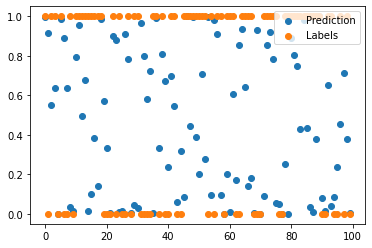

In [8]:
import matplotlib.pyplot as plt

# Scatter plot to show the spread of our predictions
plt.scatter(list(range(len(prediction))), prediction, label='Prediction')
plt.scatter(list(range(len(test_labels))), test_labels, label='Labels')
plt.legend(loc='upper right')
plt.show()

### Confusion Matrix of our Predictions

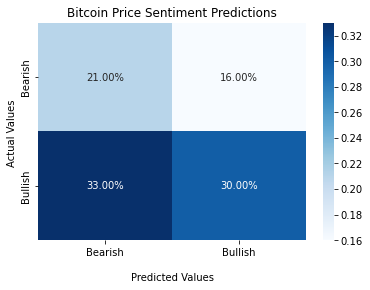

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_predict = np.around(prediction).astype(int).reshape(1,-1)
# print(test_predict)
# print(test_labels.reshape(1,-1))

cf_matrix = confusion_matrix(test_labels, test_predict[0])
# print(cf_matrix)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
ax.set_title('Bitcoin Price Sentiment Predictions');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Bearish','Bullish'])
ax.yaxis.set_ticklabels(['Bearish','Bullish'])

## Display the visualization of the Confusion Matrix.
plt.show()